# Credit Card Customer Clustering

## K-means Algorithm 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

#### Reading data from CC_GENERAL.csv

In [2]:
dataset = pd.read_csv('CC_GENERAL.csv')
datasetorg = pd.read_csv('CC_GENERAL.csv')

In [3]:
dataset

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

#### Take random samples to check dataset 

In [4]:
dataset.sample(20)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
6851  C17039  5899.427294           1.000000       0.00              0.00   
7294  C17491     9.048773           0.909091     316.20              0.00   
7652  C17858    21.870580           0.636364     405.00            255.00   
6784  C16972    28.178604           0.909091     208.60              0.00   
7396  C17598  2365.489950           1.000000       0.00              0.00   
1070  C11105  1050.926790           1.000000     150.00              0.00   
8786  C19025    93.972736           0.909091     562.50              0.00   
7825  C18038   100.418706           0.909091    1021.13              0.00   
8492  C18722  1047.182049           0.818182    1727.64              0.00   
1049  C11084  1048.067171           1.000000       0.00              0.00   
2093  C12159   981.098292           1.000000     180.00              0.00   
3169  C13260  1328.569532           1.000000     140.00            140.00   
2151  C12218    13.036611           0.818182     197.00              0.00   
7512  C17715  1372.083399           1.000000     800.00              0.00   
8215  C18435  4436.557694           1.000000    6005.90           5838.38   
8749  C18988    38.015366           1.000000     213.95              0.00   
5199  C15345    72.087172           1.000000     607.36            607.36   
7387  C17588    23.587067           1.000000     837.48              0.00   
3297  C13391   215.015895           0.285714       0.00              0.00   
3030  C13119   491.915350           1.000000    4527.64           4327.31   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
6851                    0.00   2845.745739             0.000000   
7294                  316.20      0.000000             1.000000   
7652                  150.00      0.000000             0.333333   
6784                  208.60      0.000000             0.833333   
7396                    0.00   1294.098177             0.000000   
1070                  150.00    114.462798             0.500000   
8786                  562.50      0.000000             0.909091   
7825                 1021.13      0.000000             0.833333   
8492                 1727.64      0.000000             1.000000   
1049                    0.00    158.347647             0.000000   
2093                  180.00      0.000000             1.000000   
3169                    0.00      0.000000             0.083333   
2151                  197.00      0.000000             0.500000   
7512                  800.00      0.000000             0.833333   
8215                  167.52    567.971877             1.000000   
8749                  213.95      0.000000             0.916667   
5199                    0.00      0.000000             1.000000   
7387                  837.48      0.000000             1.000000   
3297                    0.00   1034.617513             0.000000   
3030                  200.33      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
6851                    0.000000                          0.000000   
7294                    0.000000                          1.000000   
7652                    0.083333                          0.250000   
6784                    0.000000                          0.750000   
7396                    0.000000                          0.000000   
1070                    0.000000                          0.500000   
8786                    0.000000                          0.818182   
7825                    0.000000                          0.833333   
8492                    0.000000                          1.000000   
1049                    0.000000                          0.000000   
2093                    0.000000                          1.000000   
3169                    0.083333                          0.000000   
2151                    0.000000                          0.416667   

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
dataset.drop('CUST_ID', axis = 1, inplace = True)

In [7]:
dataset.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [8]:
dataset.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
dataset = dataset.dropna()
dataset

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
4      678.334763        244.791237          0.000000      12  
5     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8943    58.644883         43.473717          0.000000       6  
8945   325.594462         48.886365          0.500000       6  
8947    81

In [10]:
dataset.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
dataset.shape

(8636, 17)

In [12]:
dataset.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8636.000000        8636.000000   8636.000000       8636.000000   
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.571300           0.207697   2167.107984       1684.307803   
min        0.000000           0.000000      0.000000          0.000000   
25%      148.095189           0.909091     43.367500          0.000000   
50%      916.855459           1.000000    375.405000         44.995000   
75%     2105.195853           1.000000   1145.980000        599.100000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8636.000000   8636.000000          8636.000000   
mean               420.843533    994.175523             0.496000   
std                917.245182   2121.458303             0.401273   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 94.785000      0.000000             0.500000   
75%                484.147500   1132.385490             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8636.000000                       8636.000000   
mean                     0.205909                          0.368820   
std                      0.300054                          0.398093   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8636.000000       8636.000000    8636.000000   8636.000000   
mean                 0.137604          3.313918      15.033233   4522.091030   
std                  0.201791          6.912506      25.180468   3659.240379   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      18.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8636.000000       8636.000000       8636.000000  8636.000000  
mean    1784.478099        864.304943          0.159304    11.534391  
std     2909.810090       2372.566350          0.296271     1.310984  
min        0.049513          0.019163          0.000000     6.000000  
25%      418.559237        169.163545          0.000000    12.000000  
50%      896.675701        312.452292          0.000000    12.000000  
75%     1951.142090        825.496463          0.166667    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

<AxesSubplot:>

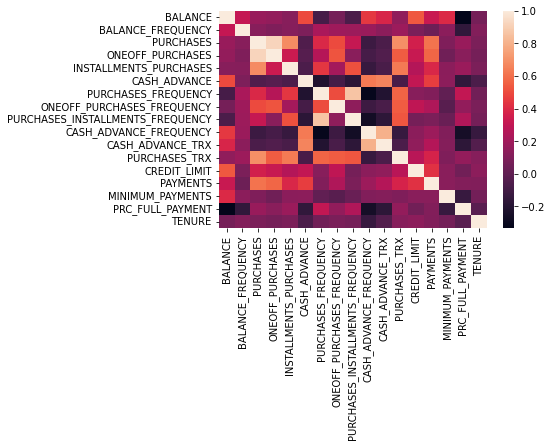

In [13]:
corr = dataset.corr()
sns.heatmap(corr)

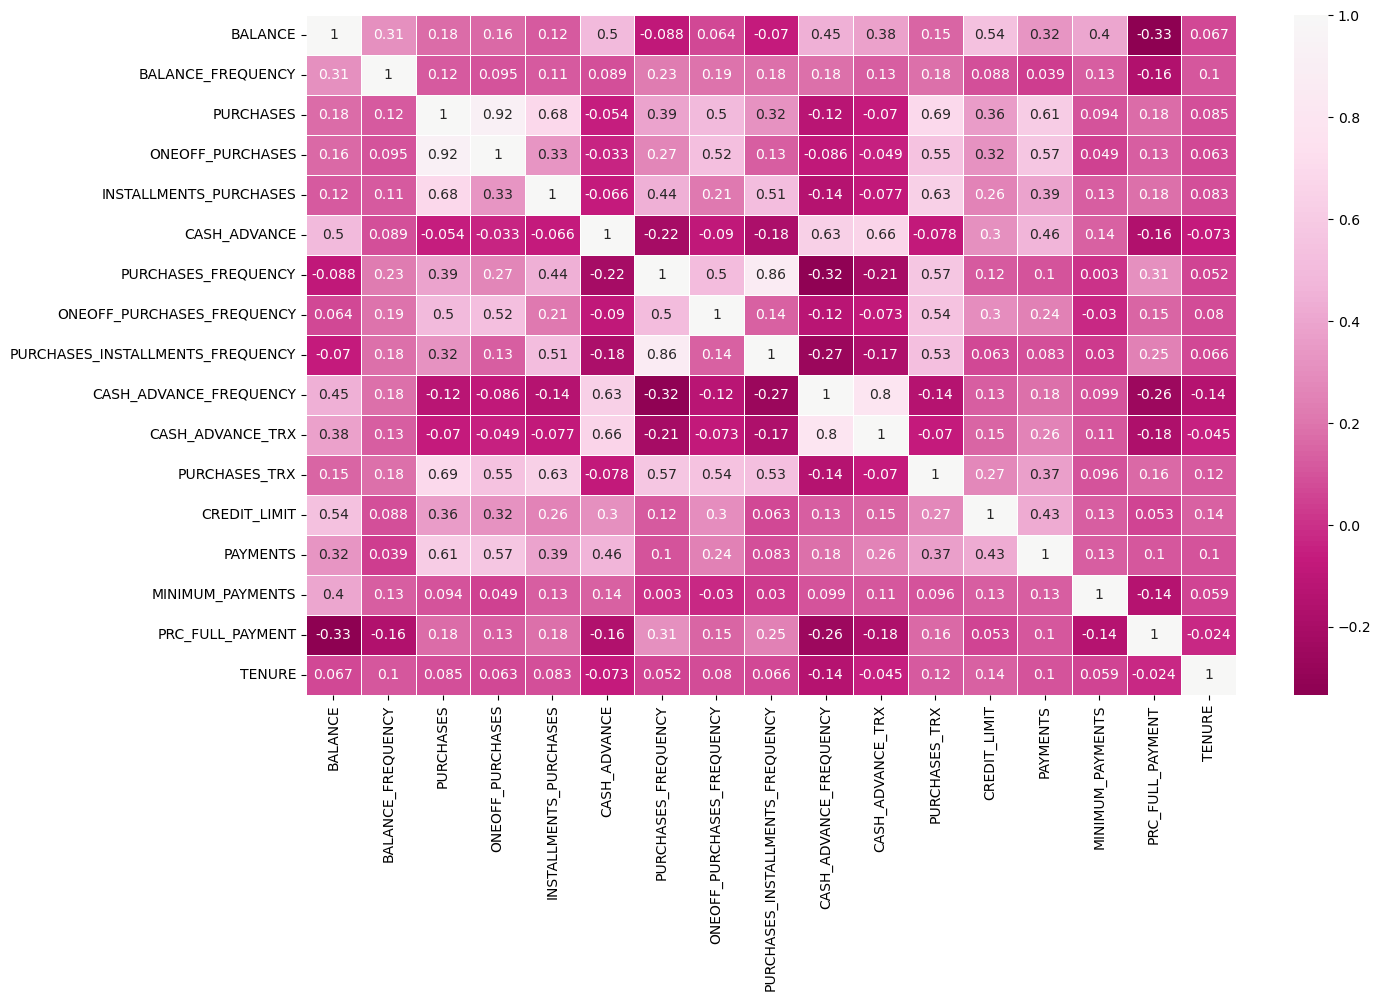

In [14]:
fig, ax = plt.subplots(figsize = (15, 9), dpi = 100)
sns.heatmap(dataset.corr(), center = 1, cbar = True, annot = True, linewidths = 0.5, ax = ax, cmap = 'PiYG')
plt.show()

In [15]:
sns.pairplot(dataset, palette='Dark2', height = 6, aspect = 1.2, kind = 'scatter', diag_kind = 'kde')

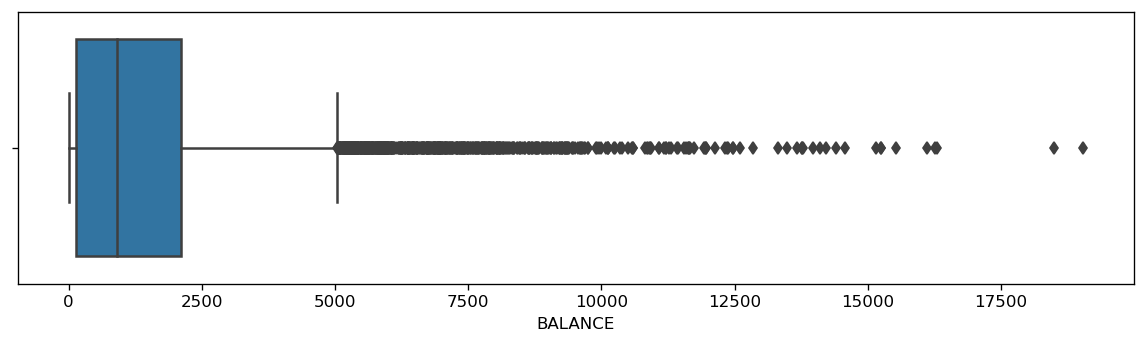

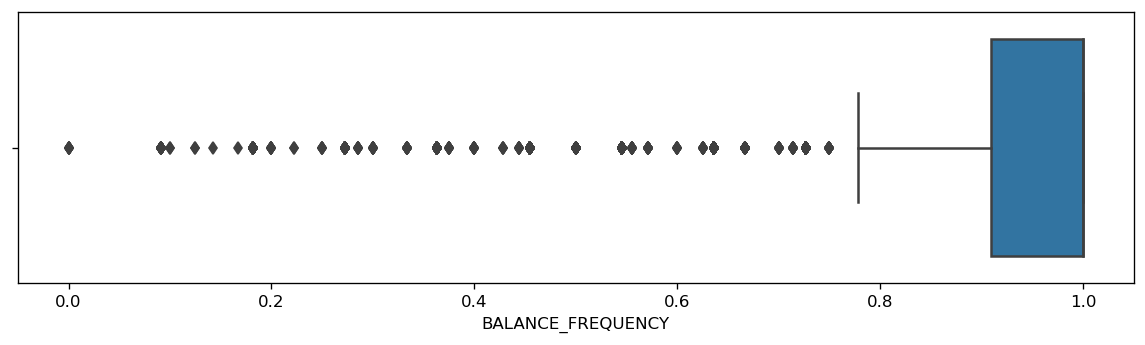

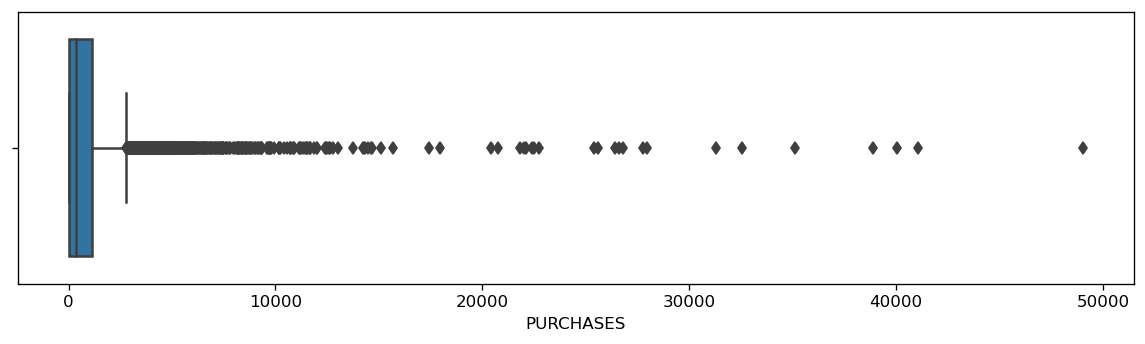

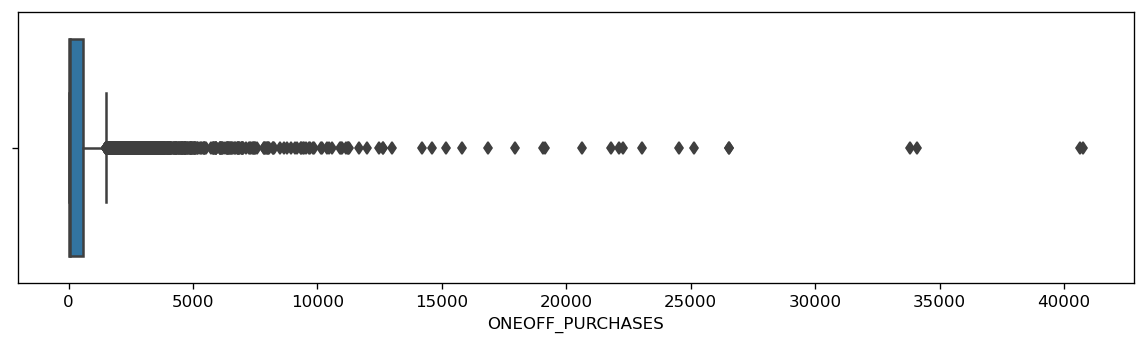

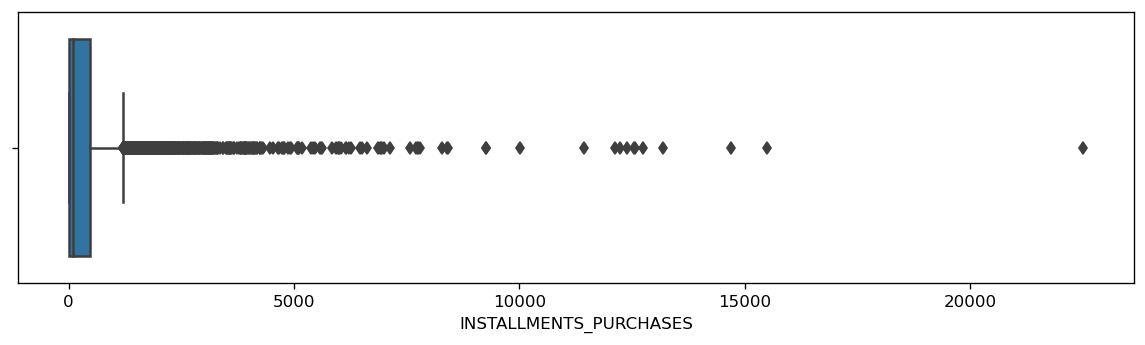

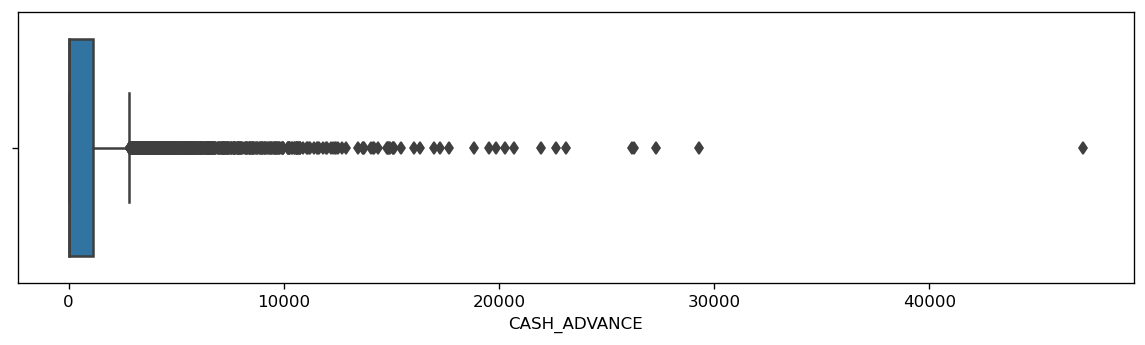

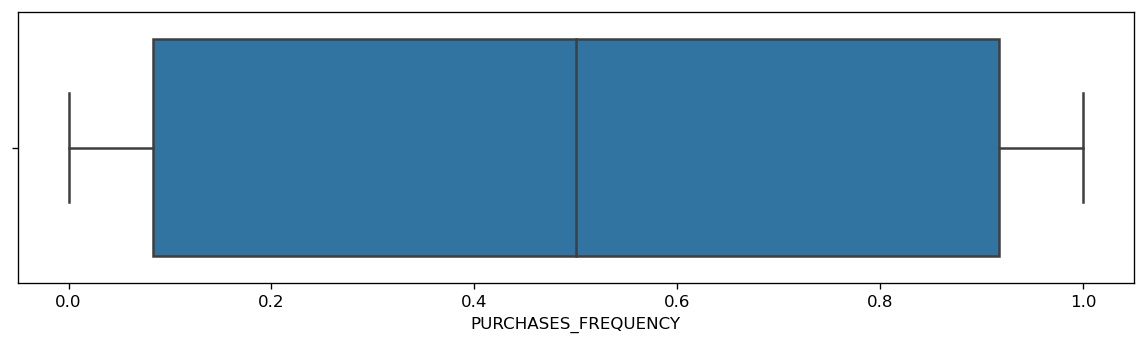

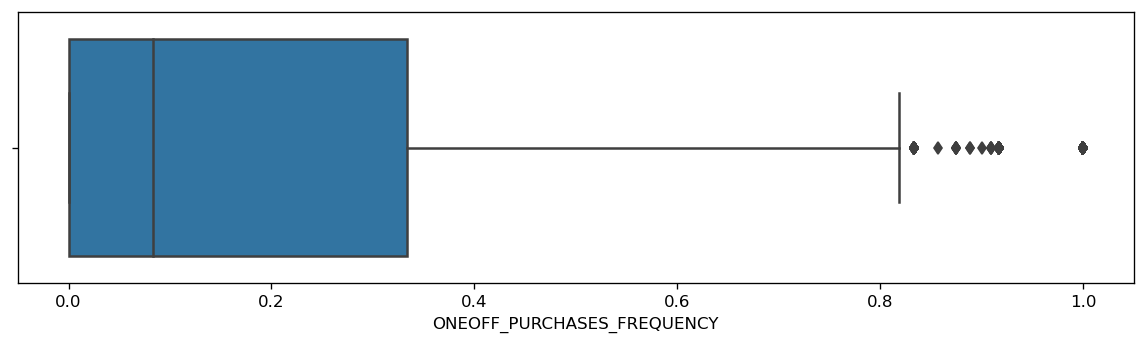

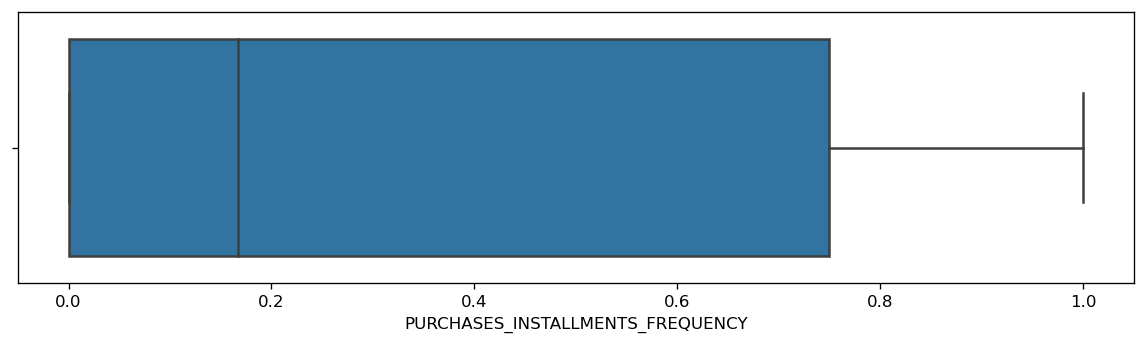

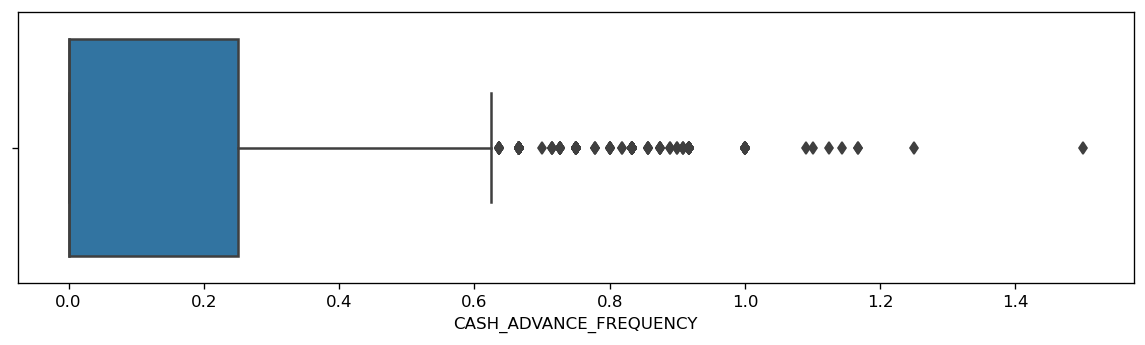

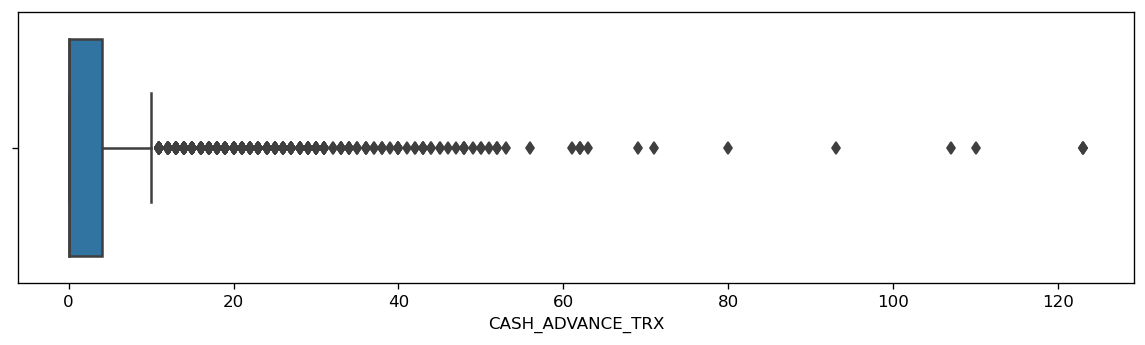

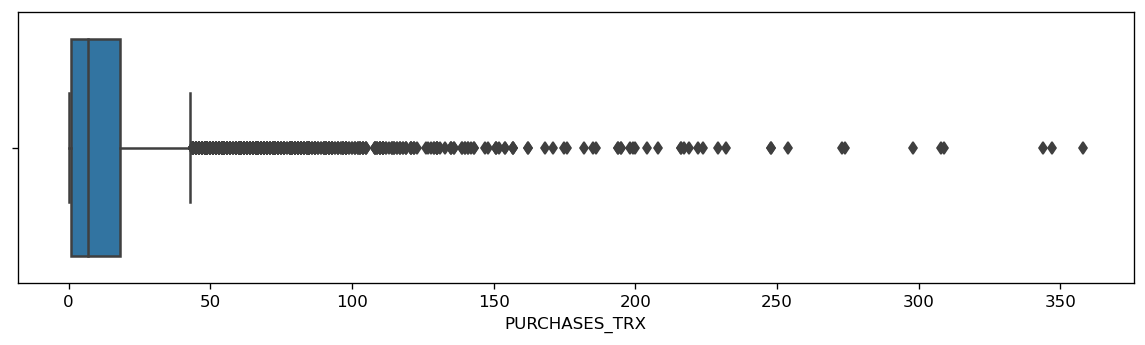

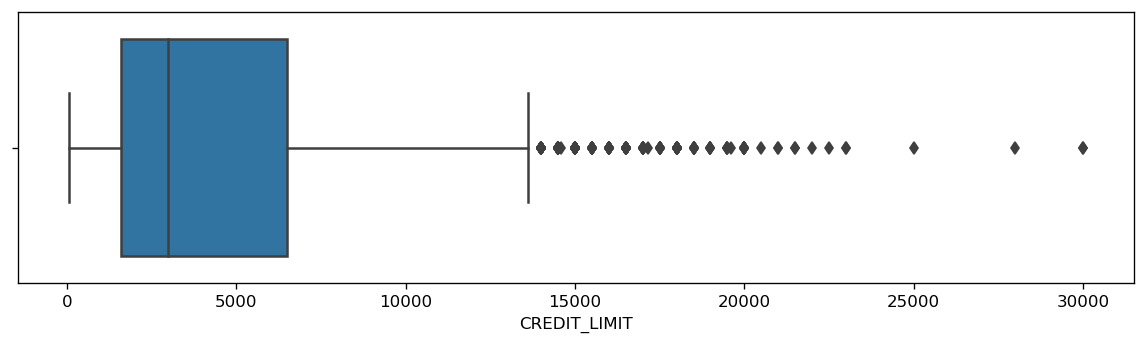

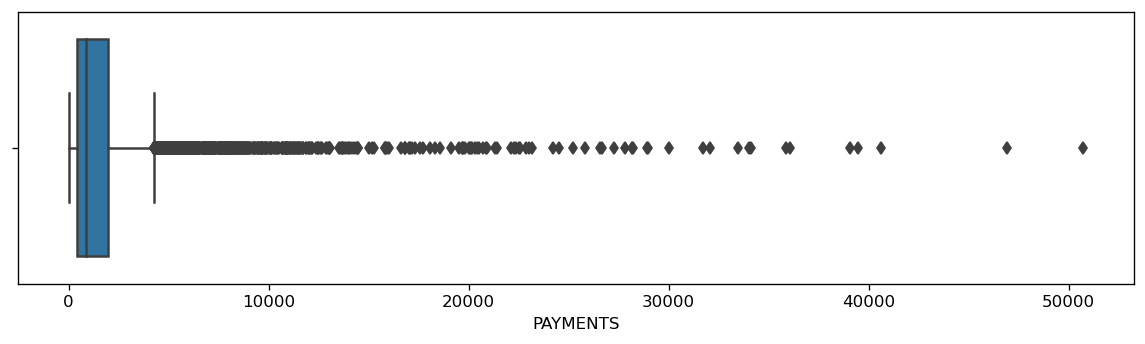

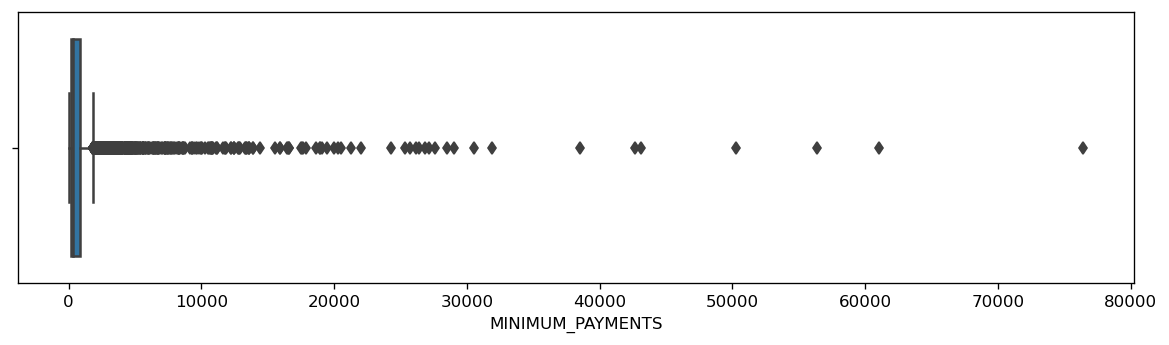

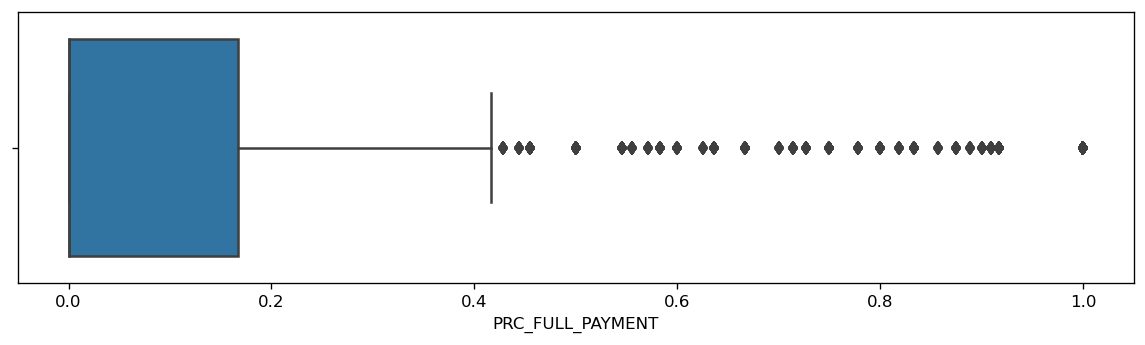

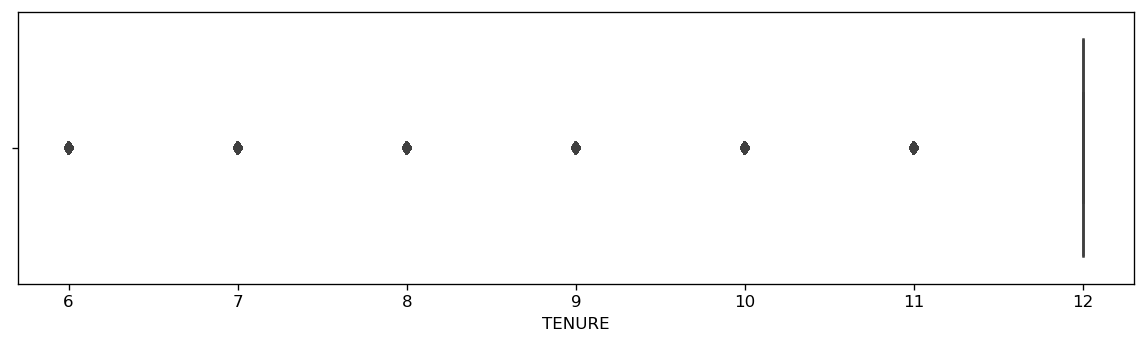

In [16]:
i = 0
while i < len(dataset.columns):
    try:
        fig = plt.figure(figsize = (12, 3), dpi = 120)
        sns.boxplot(x = dataset.columns[i], data = dataset)
        i += 1
    except:
        continue
plt.show()

C:\Users\ANILERMAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


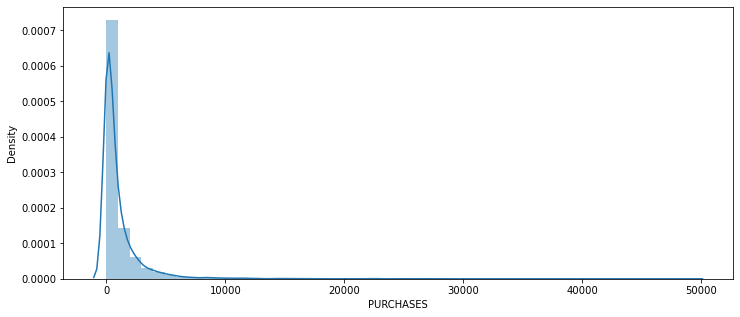

C:\Users\ANILERMAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


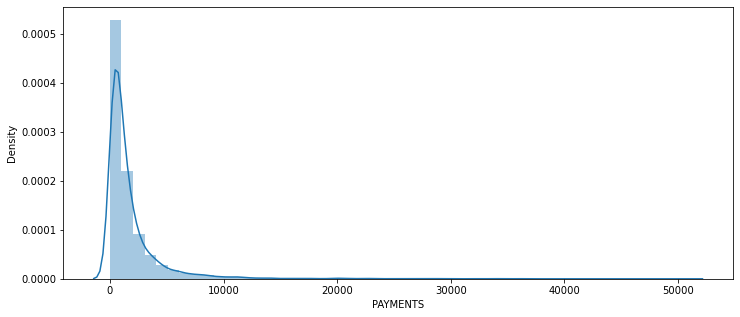

C:\Users\ANILERMAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


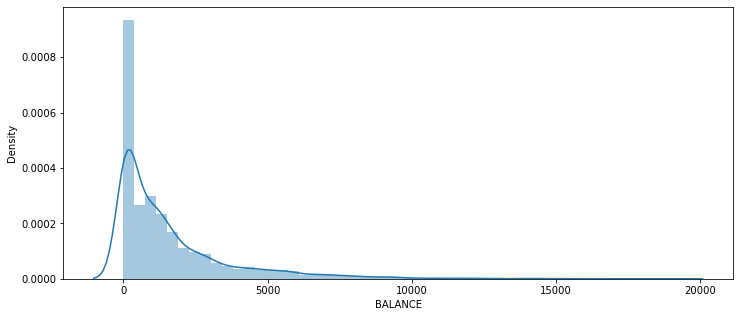

C:\Users\ANILERMAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


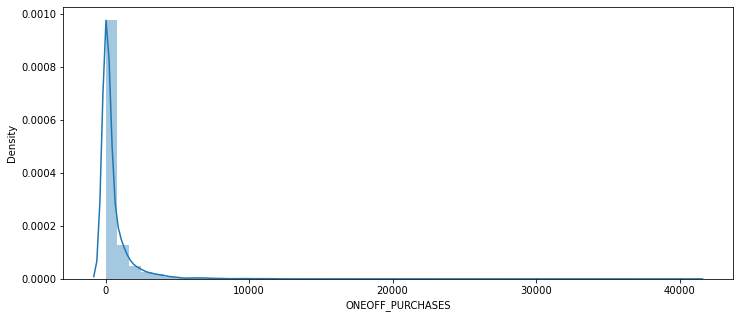

C:\Users\ANILERMAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


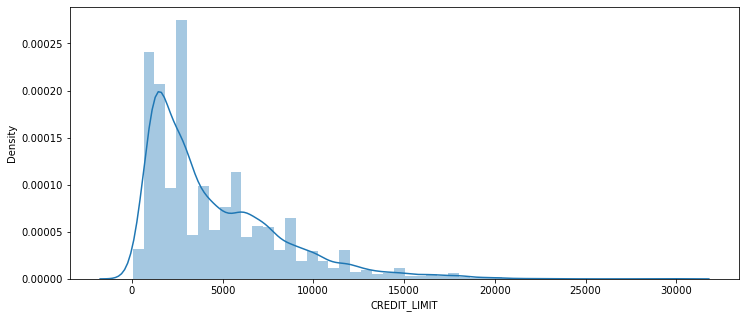

In [17]:
cols_to_plot = ["PURCHASES", "PAYMENTS", "BALANCE", "ONEOFF_PURCHASES", "CREDIT_LIMIT"]


for col in cols_to_plot:
    plt.figure(figsize=(12,5))
    sns.distplot(dataset[col])
    plt.show()

In [18]:
scaler = StandardScaler()

In [19]:
scaleddata = dataset.copy()
scaleddata = scaler.fit_transform(scaleddata)
scaleddata = pd.DataFrame(scaleddata)
scaleddata

0         1         2         3         4         5         6   \
0    -0.744625 -0.370047 -0.429184 -0.359160 -0.354826 -0.468655 -0.820769   
1     0.764152  0.067679 -0.473208 -0.359160 -0.458839  2.568556 -1.236139   
2     0.426602  0.505405 -0.116413  0.099909 -0.458839 -0.468655  1.256077   
3    -0.373910  0.505405 -0.465825 -0.349660 -0.458839 -0.468655 -1.028455   
4     0.099551  0.505405  0.142062 -0.359160  0.994815 -0.468655  0.425339   
...        ...       ...       ...       ...       ...       ...       ...   
8631 -0.761342 -1.902089 -0.463563 -0.346751 -0.458839 -0.468655 -0.820769   
8632 -0.750546  0.505405 -0.338865 -0.359160 -0.141436 -0.468655  1.256077   
8633 -0.752977 -0.297095 -0.406572 -0.359160 -0.301402 -0.468655  0.840707   
8634 -0.757721 -0.297095 -0.473208 -0.359160 -0.458839 -0.451422 -1.236139   
8635 -0.586278 -1.099590  0.031295  0.289957 -0.458839 -0.408769  0.425339   

            7         8         9         10        11        12        13  \
0    -0.686280 -0.717179 -0.681953 -0.479437 -0.517623 -0.962575 -0.543942   
1    -0.686280 -0.926522  0.557022  0.099258 -0.597054  0.677204  0.796852   
2     2.646651 -0.926522 -0.681953 -0.479437 -0.120467  0.813852 -0.399503   
3    -0.408536 -0.926522 -0.681953 -0.479437 -0.557339 -0.907916 -0.380165   
4    -0.686280  0.538882 -0.681953 -0.479437 -0.279329 -0.743938 -0.132119   
...        ...       ...       ...       ...       ...       ...       ...   
8631 -0.130790 -0.926522 -0.681953 -0.479437 -0.557339 -1.099224 -0.593143   
8632 -0.686280  1.166912 -0.681953 -0.479437 -0.358760 -0.962575 -0.501396   
8633 -0.686280  0.748227 -0.681953 -0.479437 -0.398476 -0.962575 -0.585367   
8634 -0.686280 -0.926522  0.144032 -0.190089 -0.597054 -1.099224 -0.595238   
8635  1.535675 -0.926522  0.970012 -0.190089  0.316405 -0.907916 -0.591589   

            14        15        16  
0    -0.305508 -0.537727  0.355181  
1     0.087689  0.212380  0.355181  
2    -0.099906 -0.537727  0.355181  
3    -0.261131 -0.537727  0.355181  
4     0.650363 -0.537727  0.355181  
...        ...       ...       ...  
8631 -0.345988 -0.537727 -4.221800  
8632 -0.343706  1.150015 -4.221800  
8633 -0.329572  0.306144 -4.221800  
8634 -0.340811  0.306144 -4.221800  
8635 -0.327098 -0.537727 -4.221800  

[8636 rows x 17 columns]

In [20]:
column_names = list(dataset.columns)
scaleddata.columns = column_names

scaleddata.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.744625          -0.370047  -0.429184         -0.359160   
1  0.764152           0.067679  -0.473208         -0.359160   
2  0.426602           0.505405  -0.116413          0.099909   
3 -0.373910           0.505405  -0.465825         -0.349660   
4  0.099551           0.505405   0.142062         -0.359160   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.354826     -0.468655            -0.820769   
1               -0.458839      2.568556            -1.236139   
2               -0.458839     -0.468655             1.256077   
3               -0.458839     -0.468655            -1.028455   
4                0.994815     -0.468655             0.425339   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.686280                         -0.717179   
1                   -0.686280                         -0.926522   
2                    2.646651                         -0.926522   
3                   -0.408536                         -0.926522   
4                   -0.686280                          0.538882   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.681953         -0.479437      -0.517623     -0.962575   
1                0.557022          0.099258      -0.597054      0.677204   
2               -0.681953         -0.479437      -0.120467      0.813852   
3               -0.681953         -0.479437      -0.557339     -0.907916   
4               -0.681953         -0.479437      -0.279329     -0.743938   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0 -0.543942         -0.305508         -0.537727  0.355181  
1  0.796852          0.087689          0.212380  0.355181  
2 -0.399503         -0.099906         -0.537727  0.355181  
3 -0.380165         -0.261131         -0.537727  0.355181  
4 -0.132119          0.650363         -0.537727  0.355181

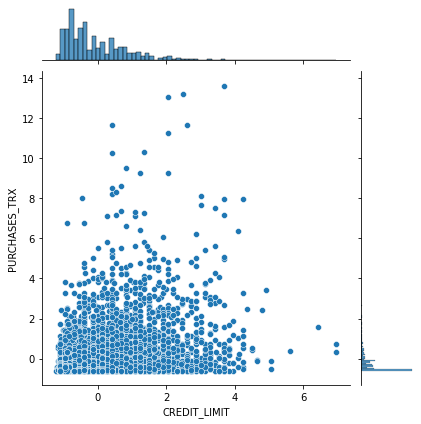

In [21]:
sns.jointplot(x = scaleddata['CREDIT_LIMIT'], y = scaleddata['PURCHASES_TRX'], data = scaleddata)

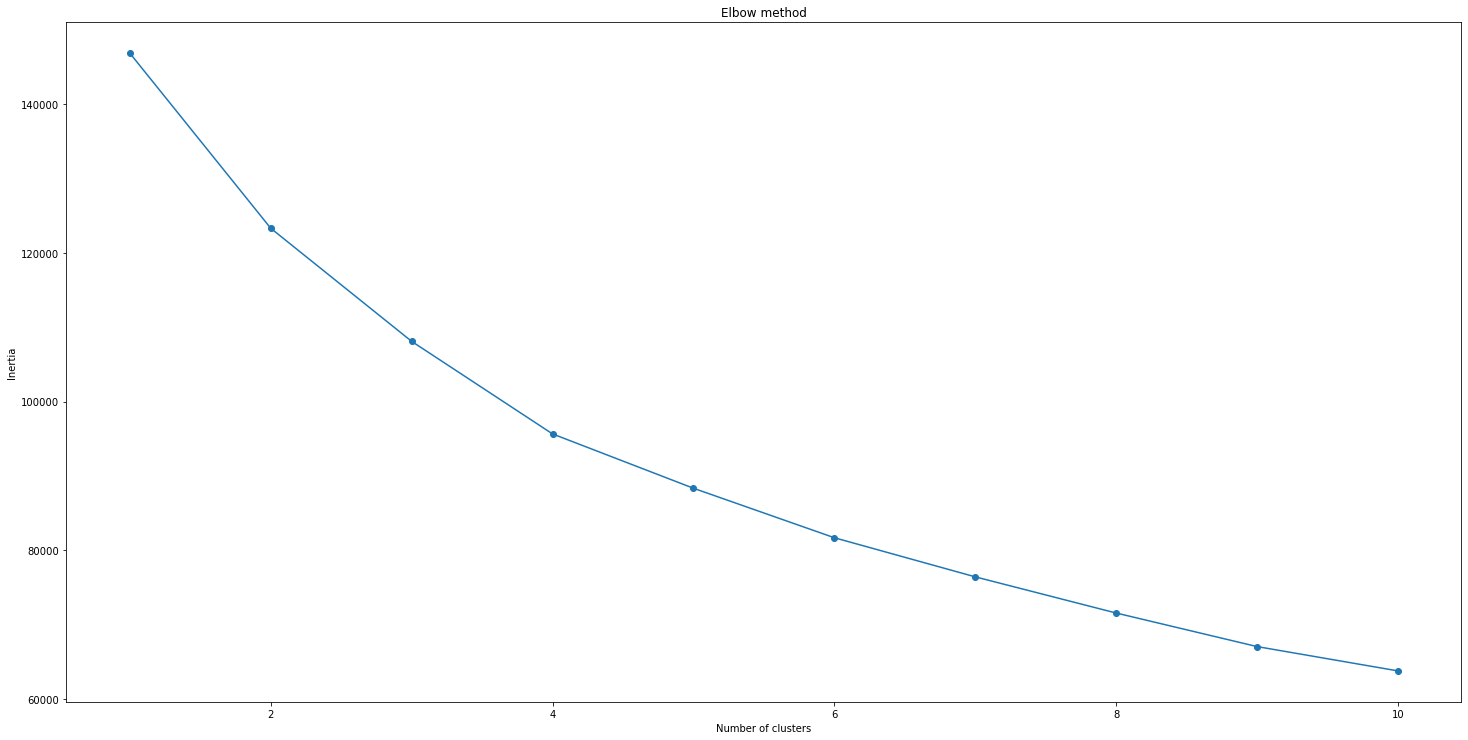

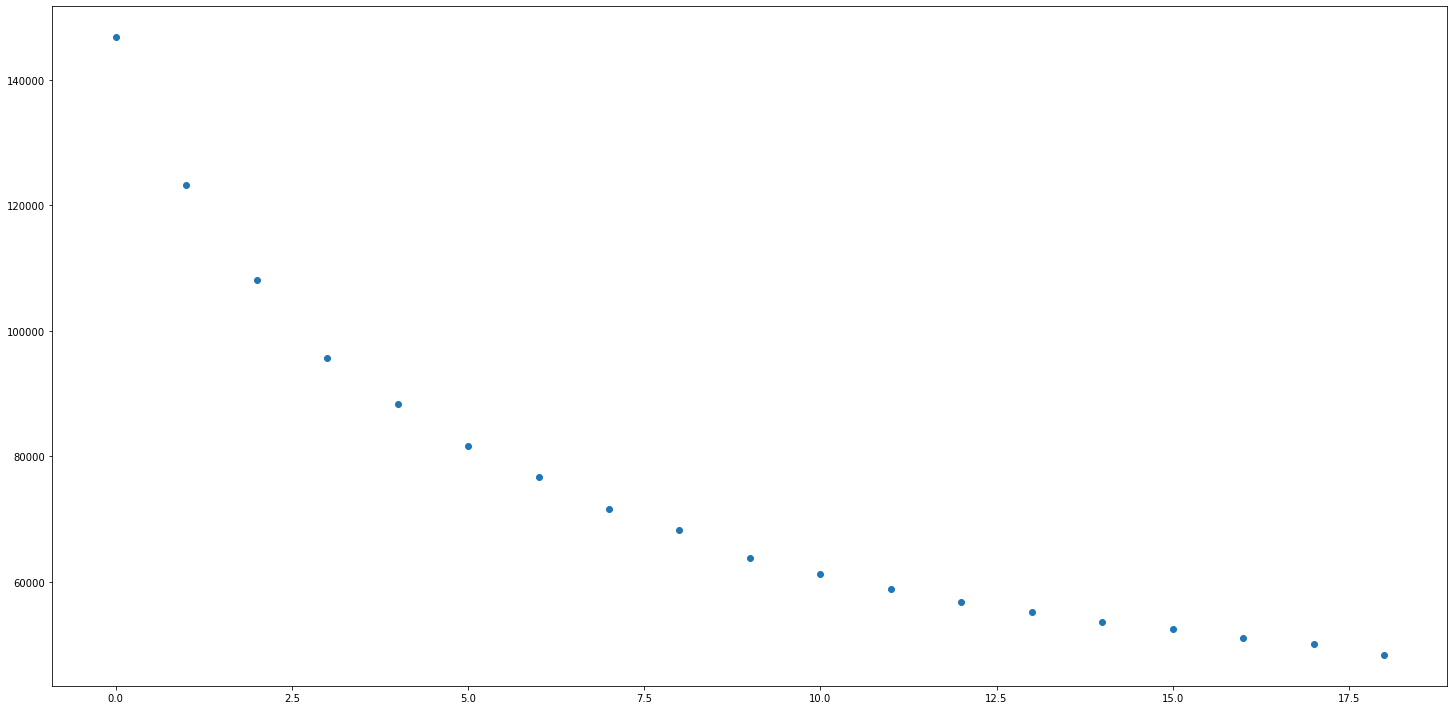

In [22]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaleddata)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize = (25,12.5))    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


n_clusters=20
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(scaleddata)
    cost.append(kmean.inertia_) 
plt.figure(figsize = (25,12.5))
plt.plot(cost, 'o')

In [23]:
dataset.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12

In [24]:
kmean= KMeans(4)
kmean.fit(scaleddata)
labels=kmean.labels_
labels

array([1, 0, 2, ..., 2, 1, 1])

In [25]:
clusters=pd.concat([scaleddata, pd.DataFrame({'CLUSTER':labels})], axis=1)
clusters.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.744625          -0.370047  -0.429184         -0.359160   
1  0.764152           0.067679  -0.473208         -0.359160   
2  0.426602           0.505405  -0.116413          0.099909   
3 -0.373910           0.505405  -0.465825         -0.349660   
4  0.099551           0.505405   0.142062         -0.359160   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.354826     -0.468655            -0.820769   
1               -0.458839      2.568556            -1.236139   
2               -0.458839     -0.468655             1.256077   
3               -0.458839     -0.468655            -1.028455   
4                0.994815     -0.468655             0.425339   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.686280                         -0.717179   
1                   -0.686280                         -0.926522   
2                    2.646651                         -0.926522   
3                   -0.408536                         -0.926522   
4                   -0.686280                          0.538882   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.681953         -0.479437      -0.517623     -0.962575   
1                0.557022          0.099258      -0.597054      0.677204   
2               -0.681953         -0.479437      -0.120467      0.813852   
3               -0.681953         -0.479437      -0.557339     -0.907916   
4               -0.681953         -0.479437      -0.279329     -0.743938   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  CLUSTER  
0 -0.543942         -0.305508         -0.537727  0.355181        1  
1  0.796852          0.087689          0.212380  0.355181        0  
2 -0.399503         -0.099906         -0.537727  0.355181        2  
3 -0.380165         -0.261131         -0.537727  0.355181        1  
4 -0.132119          0.650363         -0.537727  0.355181        2

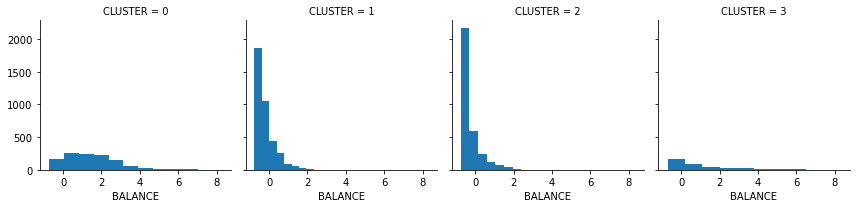

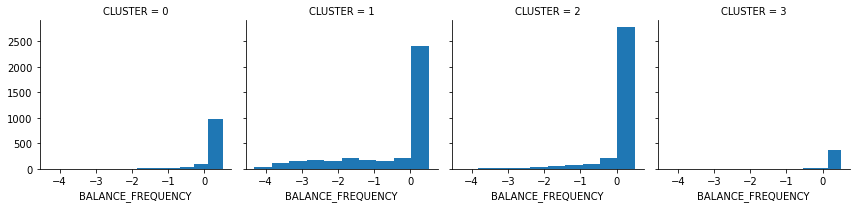

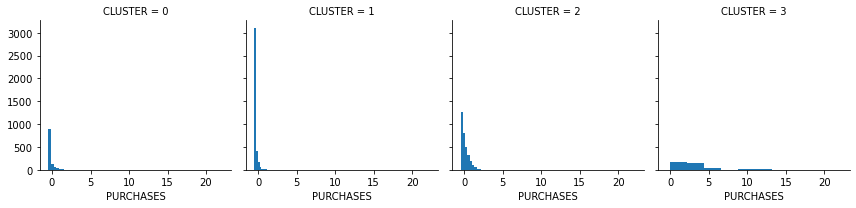

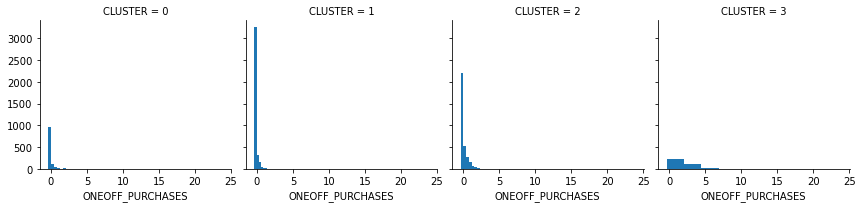

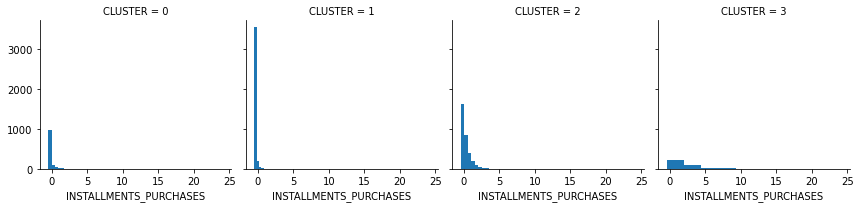

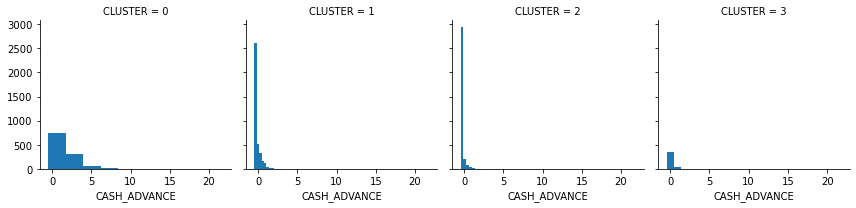

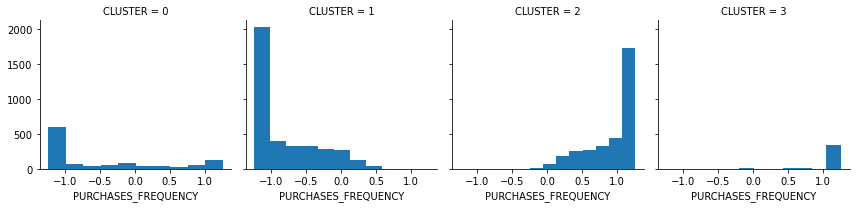

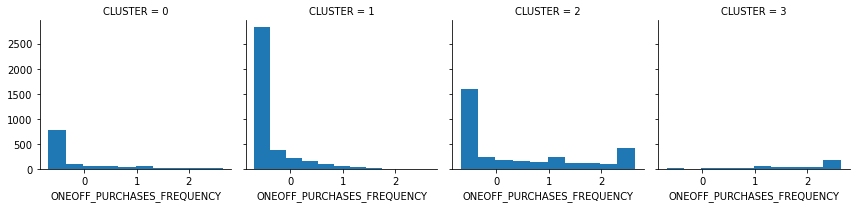

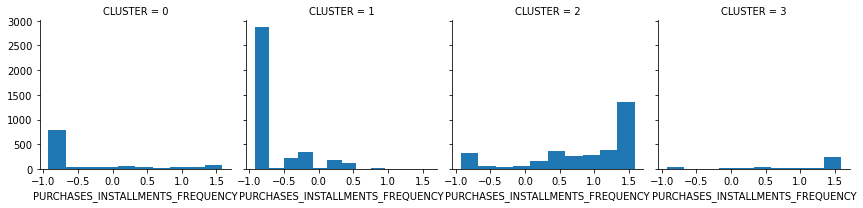

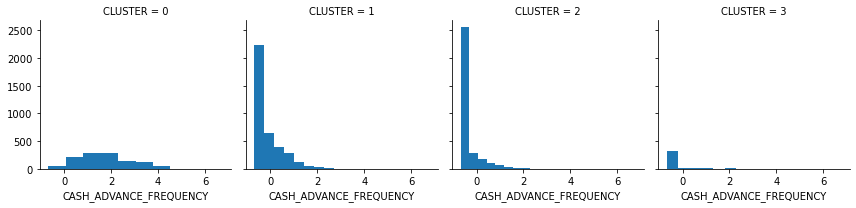

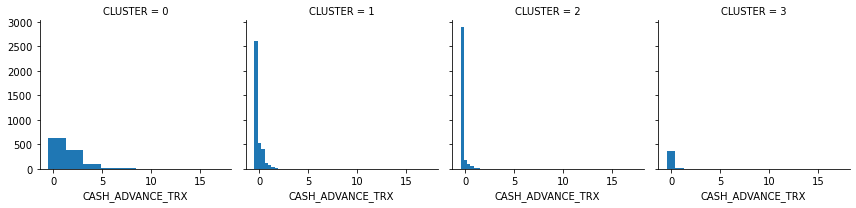

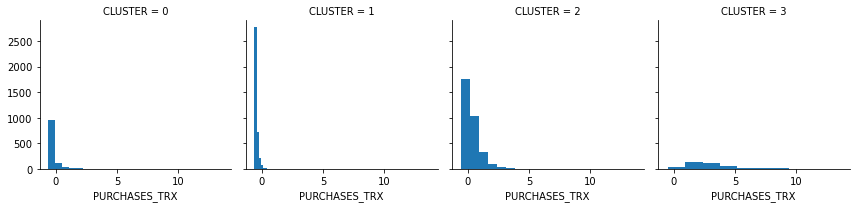

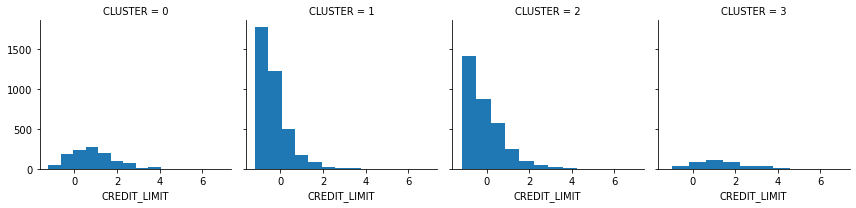

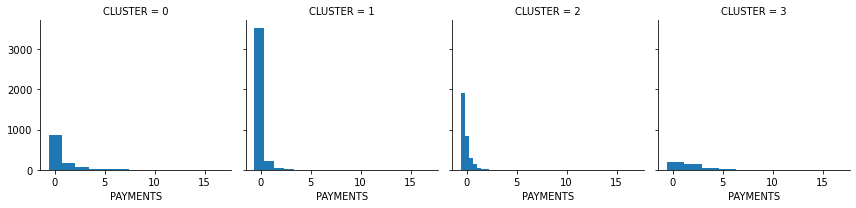

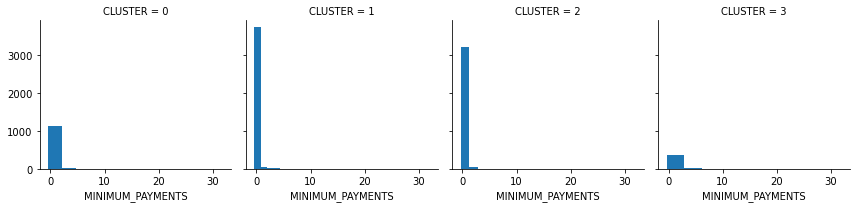

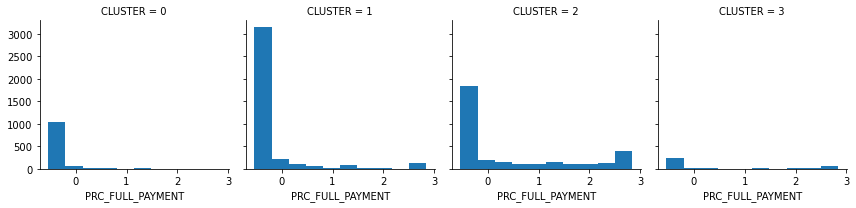

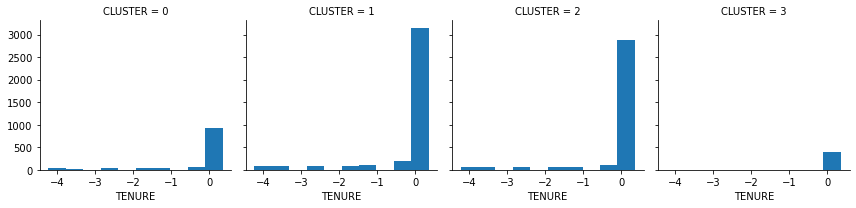

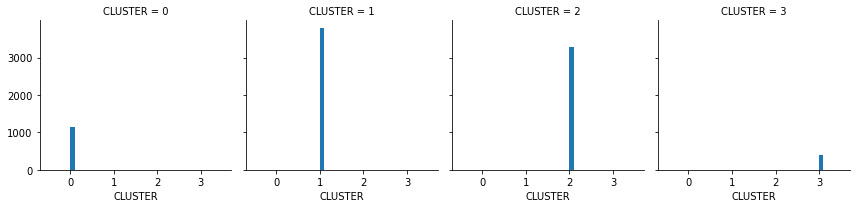

In [26]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='CLUSTER')
    grid.map(plt.hist, c)

#### Before PCA Purch. vs Credit. Graph

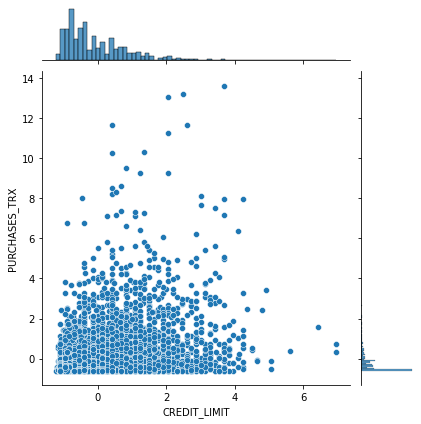

In [27]:
sns.jointplot(x = scaleddata['CREDIT_LIMIT'], y = scaleddata['PURCHASES_TRX'], data = scaleddata)

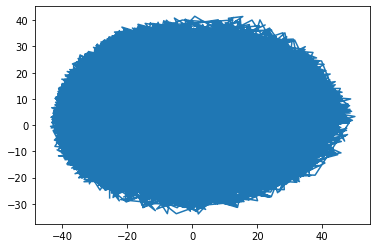

In [28]:
dist = 1 - cosine_similarity(scaleddata)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA
x, y = X_PCA[:, 0], X_PCA[:, 1]

plt.plot(x, y)

#### After PCA Purch. vs Credit. Graph

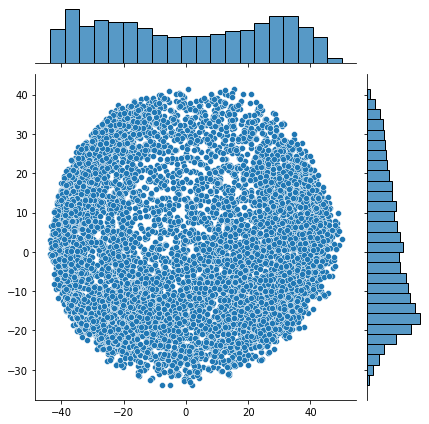

In [29]:
sns.jointplot(x = x, y = y, data = X_PCA)

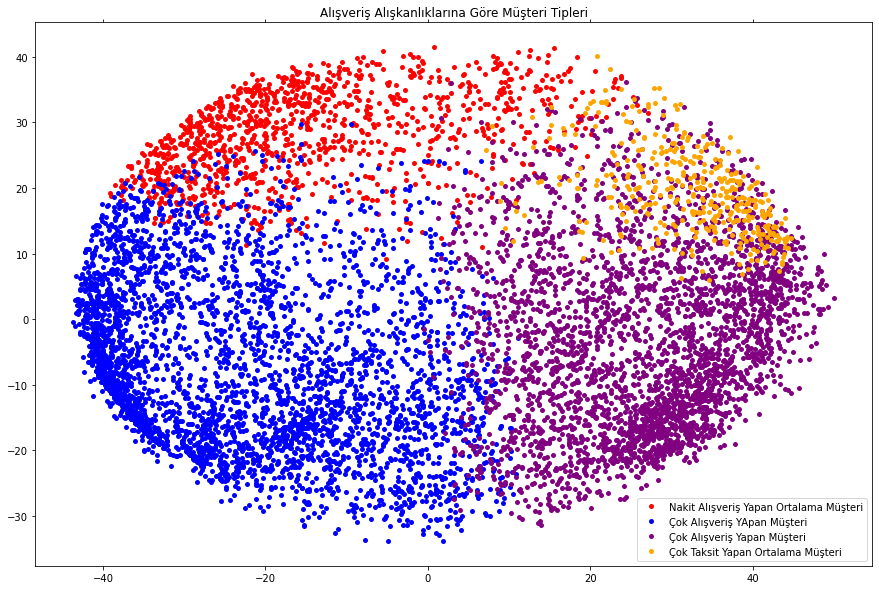

In [41]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'purple',
          3: 'orange'
          }

names = {0: 'Nakit Alışveriş Yapan Ortalama Müşteri', 
         1: 'Çok Alışveriş YApan Müşteri', 
         2: 'Çok Alışveriş Yapan Müşteri',
         3: 'Çok Taksit Yapan Ortalama Müşteri'
         }
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Alışveriş Alışkanlıklarına Göre Müşteri Tipleri")
plt.show()
